In [1]:
from product import Option, Strategy
from euronext import Page
from graph import Graph
g=Graph(4800, 5400, 25)


In [2]:
p = Page()
p.fetch()
options = p.scrap_options()

In [ ]:
# test data when interet is fall
import numpy as np
sT = np.arange(4800,5400,25)
o = Option(strike=4900, achat=212.40, vente=219.40, multiplier=10)
c = Option(cat='Call', strike=4900, achat=212.40, vente=219.40, multiplier=10)
p = Option(cat='Put', strike=4900, achat=9.10, vente=11.60, multiplier=10)
print(str(o));print(str(c));print(str(p))

In [3]:
call = {s : k['call'] for s, k in options.items()}
put = {s : k['put'] for s, k in options.items()}
options.keys()

dict_keys([4900.0, 4950.0, 5000.0, 5050.0, 5075.0, 5100.0, 5125.0, 5150.0, 5175.0, 5200.0, 5250.0, 5300.0])

In [ ]:
s2 = Strategy('Strategy : call+2*put long').add(call[4900], 'long', 1).add(call[5300], 'short', 2)
g.profit(call[4950], 'long')
g.profit_strategy(s2)
g.compare(call[5000], 'long', s2, 'long')

In [ ]:
butterfly = (Strategy('Butterfly C5000-2*C5100+C5200')
             .add(call[4900], 'long', 1)
             .add(call[5100], 'short', 2)
             .add(call[5300], 'long', 1))
g.profit_strategy(butterfly)
g.compare(call[5000], 'long', butterfly, 'long')

Cost : 94.7


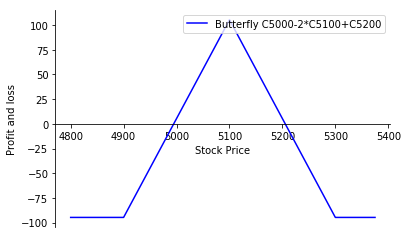

In [17]:
butterfly = (Strategy('Butterfly C5000-2*C5100+C5200')
             .add(call[4900], 'long', 1)
             .add(call[5100], 'short', 2)
             .add(call[5300], 'long', 1))
print('Cost : {}'.format(butterfly.cost()))
g.profit_strategy(butterfly)

Ratio Backspreads Cost : 234.7
Call 5000 Cost : 125.5


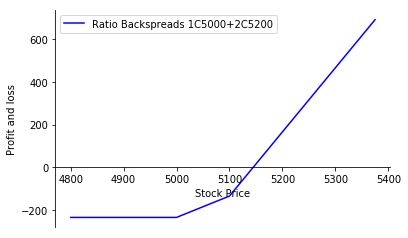

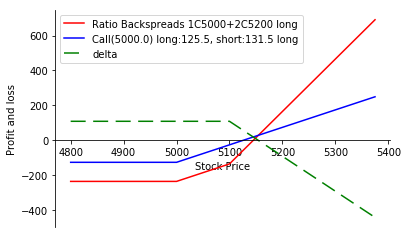

In [30]:
ratio_backspreads = (Strategy('Ratio Backspreads 1C5000+2C5200')
             .add(call[5000], 'long', 1)
             .add(call[5100], 'long', 2))
print('Ratio Backspreads Cost : {}'.format(ratio_backspreads.cost()))
print('Call 5000 Cost : {}'.format(call[5000].cost('long')))

g.profit_strategy(ratio_backspreads)
g.compare(ratio_backspreads, 'long', call[5000], 'long')

Straddle Cost : 104.0


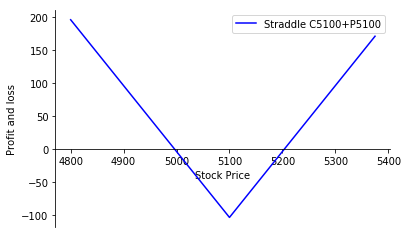

In [37]:
straddle = (Strategy('Straddle C5100+P5100')
             .add(call[5100], 'long', 1)
             .add(put[5100], 'long', 1))
print('Straddle Cost : {}'.format(straddle.cost()))
g.profit_strategy(straddle)

